In [1]:
import sys, pandas_profiling
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

from collections import OrderedDict
np.set_printoptions(suppress=True, threshold=sys.maxsize)

In [2]:
%matplotlib inline
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.2f}'.format


In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [45]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [4]:
supervised_df = pd.read_csv('hourly_supervised_df.csv', index_col=0)

In [5]:
supervised_df.head()

,Date,Clock_Time,Temperature,Weather,Wind_Speed,Humidity,Visibility,Formatted_Date,Year,Month,Day,Weather_Category,WTHR_n_3_hour,WS_n_3_hour,HUM_n_3_hour,VIS_n_3_hour,WTHR_n_6_hour,WS_n_6_hour,HUM_n_6_hour,VIS_n_6_hour,WTHR_n_9_hour,WS_n_9_hour,HUM_n_9_hour,VIS_n_9_hour,WTHR_n_12_hour,WS_n_12_hour,HUM_n_12_hour,VIS_n_12_hour,WTHR_n_1_day,WS_n_1_day,HUM_n_1_day,VIS_n_1_day,WTHR_n_2_day,WS_n_2_day,HUM_n_2_day,VIS_n_2_day,WTHR_n_3_day,WS_n_3_day,HUM_n_3_day,VIS_n_3_day,WTHR_n_1_week,WS_n_1_week,HUM_n_1_week,VIS_n_1_week,WTHR_n_2_week,WS_n_2_week,HUM_n_2_week,VIS_n_2_week,WTHR_n_1_year,WS_n_1_year,HUM_n_1_year,VIS_n_1_year,WTHR_n_2_year,WS_n_2_year,HUM_n_2_year,VIS_n_2_year
0,09-Sep-09,0:40,30.00,Haze.,15.00,0.75,4.00,2009-09-09 00:30:00,2009,9,9,Foggy,Clear,8.54,0.54,4.17,Clear,8.57,0.54,4.17,Clear,8.59,0.54,4.18,Clear,8.58,0.54,4.17,Clear,8.52,0.54,4.18,Clear,8.51,0.54,4.17,Clear,8.51,0.54,4.17,Clear,8.49,0.54,4.18,Clear,8.52,0.55,4.17,Clear,8.54,0.54,4.22,Clear,8.37,0.54,4.25
1,09-Sep-09,1:40,30.00,Haze.,17.00,0.75,4.00,2009-09-09 01:30:00,2009,9,9,Foggy,Clear,8.54,0.54,4.17,Clear,8.57,0.54,4.17,Clear,8.59,0.54,4.18,Clear,8.58,0.54,4.17,Clear,8.52,0.54,4.18,Clear,8.51,0.54,4.17,Clear,8.51,0.54,4.17,Clear,8.49,0.54,4.18,Clear,8.52,0.55,4.17,Clear,8.54,0.54,4.22,Clear,8.37,0.54,4.25
2,09-Sep-09,11:40,31.00,Scattered clouds.,17.00,0.70,6.00,2009-09-09 11:30:00,2009,9,9,Cloudy,Clear,8.54,0.54,4.17,Clear,8.57,0.54,4.17,Clear,8.59,0.54,4.18,Clear,8.58,0.54,4.17,Clear,8.52,0.54,4.18,Clear,8.51,0.54,4.17,Clear,8.51,0.54,4.17,Clear,8.49,0.54,4.18,Clear,8.52,0.55,4.17,Clear,8.54,0.54,4.22,Clear,8.37,0.54,4.25
3,09-Sep-09,13:40,33.00,Clear.,19.00,0.59,6.00,2009-09-09 13:30:00,2009,9,9,Clear,Clear,8.54,0.54,4.17,Clear,8.57,0.54,4.17,Clear,8.59,0.54,4.18,Foggy,17.00,0.75,4.00,Clear,8.52,0.54,4.18,Clear,8.51,0.54,4.17,Clear,8.51,0.54,4.17,Clear,8.49,0.54,4.18,Clear,8.52,0.55,4.17,Clear,8.54,0.54,4.22,Clear,8.37,0.54,4.25
4,09-Sep-09,14:40,34.00,Clear.,17.00,0.56,6.00,2009-09-09 14:30:00,2009,9,9,Clear,Cloudy,17.00,0.70,6.00,Clear,8.57,0.54,4.17,Clear,8.59,0.54,4.18,Clear,8.58,0.54,4.17,Clear,8.52,0.54,4.18,Clear,8.51,0.54,4.17,Clear,8.51,0.54,4.17,Clear,8.49,0.54,4.18,Clear,8.52,0.55,4.17,Clear,8.54,0.54,4.22,Clear,8.37,0.54,4.25


In [6]:
supervised_df.columns

Index(['Date', 'Clock_Time', 'Temperature', 'Weather', 'Wind_Speed',
       'Humidity', 'Visibility', 'Formatted_Date', 'Year', 'Month', 'Day',
       'Weather_Category', 'WTHR_n_3_hour', 'WS_n_3_hour', 'HUM_n_3_hour',
       'VIS_n_3_hour', 'WTHR_n_6_hour', 'WS_n_6_hour', 'HUM_n_6_hour',
       'VIS_n_6_hour', 'WTHR_n_9_hour', 'WS_n_9_hour', 'HUM_n_9_hour',
       'VIS_n_9_hour', 'WTHR_n_12_hour', 'WS_n_12_hour', 'HUM_n_12_hour',
       'VIS_n_12_hour', 'WTHR_n_1_day', 'WS_n_1_day', 'HUM_n_1_day',
       'VIS_n_1_day', 'WTHR_n_2_day', 'WS_n_2_day', 'HUM_n_2_day',
       'VIS_n_2_day', 'WTHR_n_3_day', 'WS_n_3_day', 'HUM_n_3_day',
       'VIS_n_3_day', 'WTHR_n_1_week', 'WS_n_1_week', 'HUM_n_1_week',
       'VIS_n_1_week', 'WTHR_n_2_week', 'WS_n_2_week', 'HUM_n_2_week',
       'VIS_n_2_week', 'WTHR_n_1_year', 'WS_n_1_year', 'HUM_n_1_year',
       'VIS_n_1_year', 'WTHR_n_2_year', 'WS_n_2_year', 'HUM_n_2_year',
       'VIS_n_2_year'],
      dtype='object')

In [7]:
WTHR_columns = supervised_df.columns[supervised_df.columns.str.contains('WTHR')]
WS_columns = supervised_df.columns[supervised_df.columns.str.contains('WS')]
VIS_columns = supervised_df.columns[supervised_df.columns.str.contains('VIS')]
HUM_columns = supervised_df.columns[supervised_df.columns.str.contains('HUM')]

In [8]:
supervised_df[WTHR_columns] = supervised_df[WTHR_columns].fillna(
    supervised_df[WTHR_columns].mode(axis=0).iloc[0])

In [9]:
supervised_df[WS_columns] = supervised_df[WS_columns].fillna(
    supervised_df[WS_columns].mean(axis=0))

In [10]:
supervised_df[VIS_columns] = supervised_df[VIS_columns].fillna(
    supervised_df[VIS_columns].mean(axis=0))

In [11]:
supervised_df[HUM_columns] = supervised_df[HUM_columns].fillna(
    supervised_df[HUM_columns].mean(axis=0))

In [12]:
supervised_df.columns

Index(['Date', 'Clock_Time', 'Temperature', 'Weather', 'Wind_Speed',
       'Humidity', 'Visibility', 'Formatted_Date', 'Year', 'Month', 'Day',
       'Weather_Category', 'WTHR_n_3_hour', 'WS_n_3_hour', 'HUM_n_3_hour',
       'VIS_n_3_hour', 'WTHR_n_6_hour', 'WS_n_6_hour', 'HUM_n_6_hour',
       'VIS_n_6_hour', 'WTHR_n_9_hour', 'WS_n_9_hour', 'HUM_n_9_hour',
       'VIS_n_9_hour', 'WTHR_n_12_hour', 'WS_n_12_hour', 'HUM_n_12_hour',
       'VIS_n_12_hour', 'WTHR_n_1_day', 'WS_n_1_day', 'HUM_n_1_day',
       'VIS_n_1_day', 'WTHR_n_2_day', 'WS_n_2_day', 'HUM_n_2_day',
       'VIS_n_2_day', 'WTHR_n_3_day', 'WS_n_3_day', 'HUM_n_3_day',
       'VIS_n_3_day', 'WTHR_n_1_week', 'WS_n_1_week', 'HUM_n_1_week',
       'VIS_n_1_week', 'WTHR_n_2_week', 'WS_n_2_week', 'HUM_n_2_week',
       'VIS_n_2_week', 'WTHR_n_1_year', 'WS_n_1_year', 'HUM_n_1_year',
       'VIS_n_1_year', 'WTHR_n_2_year', 'WS_n_2_year', 'HUM_n_2_year',
       'VIS_n_2_year'],
      dtype='object')

In [13]:
supervised_df.isna().sum() * 100 / len(supervised_df)

Date               0.00
Clock_Time         0.00
Temperature        0.54
Weather            0.00
Wind_Speed         0.22
Humidity           0.63
Visibility         0.00
Formatted_Date     0.00
Year               0.00
Month              0.00
Day                0.00
Weather_Category   0.00
WTHR_n_3_hour      0.00
WS_n_3_hour        0.00
HUM_n_3_hour       0.00
VIS_n_3_hour       0.00
WTHR_n_6_hour      0.00
WS_n_6_hour        0.00
HUM_n_6_hour       0.00
VIS_n_6_hour       0.00
WTHR_n_9_hour      0.00
WS_n_9_hour        0.00
HUM_n_9_hour       0.00
VIS_n_9_hour       0.00
WTHR_n_12_hour     0.00
WS_n_12_hour       0.00
HUM_n_12_hour      0.00
VIS_n_12_hour      0.00
WTHR_n_1_day       0.00
WS_n_1_day         0.00
HUM_n_1_day        0.00
VIS_n_1_day        0.00
WTHR_n_2_day       0.00
WS_n_2_day         0.00
HUM_n_2_day        0.00
VIS_n_2_day        0.00
WTHR_n_3_day       0.00
WS_n_3_day         0.00
HUM_n_3_day        0.00
VIS_n_3_day        0.00
WTHR_n_1_week      0.00
WS_n_1_week     

In [14]:
X_columns = WS_columns
y_column = ['Wind_Speed']

In [15]:
values = supervised_df[WS_columns.to_list() + y_column].values

n_train_hours = 365 * 24 * 2 * 4
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(70080, 1, 11) (70080,) (57390, 1, 11) (57390,)


In [22]:
from keras import Sequential
from keras.layers import LSTM, Dense, Activation

In [23]:
model = Sequential()
model.add(LSTM(units=50, 
               input_shape=(train_X.shape[1], train_X.shape[2]),
               return_sequences=True))
model.add(Activation(activation='relu'))

model.add(LSTM(units=50))
model.add(Activation(activation='relu'))

model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [24]:
history = model.fit(x=train_X, 
                    y=train_y, 
                    epochs=50, 
                    batch_size=72, 
                    validation_data=(test_X, test_y), 
                    verbose=1, 
                    shuffle=False)

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Train on 70080 samples, validate on 57390 samples
Epoch 1/50
70080/70080 [==============================] - 13s 190us/step - loss: nan - val_loss: nan
Epoch 2/50
70080/70080 [==============================] - 11s 155us/step - loss: nan - val_loss: nan
Epoch 3/50
20376/70080 [=======>......................] - ETA: 5s - loss: nan

KeyboardInterrupt: 

In [30]:
dataset_hourly = pd.read_csv('dataset_formatted.csv', index_col=0)
dataset_hourly.shape

(127470, 12)

In [31]:
dataset_hourly.head()

,Date,Clock_Time,Temperature,Weather,Wind_Speed,Humidity,Visibility,Formatted_Date,Year,Month,Day,Weather_Category
0,09-Sep-09,0:40,30.00,Haze.,15.00,0.75,4.00,2009-09-09 00:30:00,2009,9,9,Foggy
1,09-Sep-09,1:40,30.00,Haze.,17.00,0.75,4.00,2009-09-09 01:30:00,2009,9,9,Foggy
2,09-Sep-09,11:40,31.00,Scattered clouds.,17.00,0.70,6.00,2009-09-09 11:30:00,2009,9,9,Cloudy
3,09-Sep-09,13:40,33.00,Clear.,19.00,0.59,6.00,2009-09-09 13:30:00,2009,9,9,Clear
4,09-Sep-09,14:40,34.00,Clear.,17.00,0.56,6.00,2009-09-09 14:30:00,2009,9,9,Clear


In [ ]:
reqd_df = dataset_hourly[['Temperature', 'Humidity', 'Visibility', 'Weather_Category', 'Wind_Speed']].copy()

In [ ]:
encoder = LabelEncoder()
reqd_df['Weather_Category'] = encoder.fit_transform(reqd_df['Weather_Category'])

In [129]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# reqd_df_scaled = scaler.fit_transform(reqd_df)

In [179]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    column_names = data.columns
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (column_names[j], i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('%s(t)' % column_names[j]) for j in range(n_vars)]
        else:
            names += [('%s(t+%d)' % (column_names[j], i) for j in range(n_vars))]
    
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg



In [180]:
n_sup_df = series_to_supervised(data=reqd_df,
                     n_in=30,
                     n_out=1)

In [181]:
n_sup_df.head()

,Humidity(t-30),Visibility(t-30),Weather_Category(t-30),Wind_Speed(t-30),Humidity(t-29),Visibility(t-29),Weather_Category(t-29),Wind_Speed(t-29),Humidity(t-28),Visibility(t-28),Weather_Category(t-28),Wind_Speed(t-28),Humidity(t-27),Visibility(t-27),Weather_Category(t-27),Wind_Speed(t-27),Humidity(t-26),Visibility(t-26),Weather_Category(t-26),Wind_Speed(t-26),Humidity(t-25),Visibility(t-25),Weather_Category(t-25),Wind_Speed(t-25),Humidity(t-24),Visibility(t-24),Weather_Category(t-24),Wind_Speed(t-24),Humidity(t-23),Visibility(t-23),Weather_Category(t-23),Wind_Speed(t-23),Humidity(t-22),Visibility(t-22),Weather_Category(t-22),Wind_Speed(t-22),Humidity(t-21),Visibility(t-21),Weather_Category(t-21),Wind_Speed(t-21),Humidity(t-20),Visibility(t-20),Weather_Category(t-20),Wind_Speed(t-20),Humidity(t-19),Visibility(t-19),Weather_Category(t-19),Wind_Speed(t-19),Humidity(t-18),Visibility(t-18),...,Weather_Category(t-12),Wind_Speed(t-12),Humidity(t-11),Visibility(t-11),Weather_Category(t-11),Wind_Speed(t-11),Humidity(t-10),Visibility(t-10),Weather_Category(t-10),Wind_Speed(t-10),Humidity(t-9),Visibility(t-9),Weather_Category(t-9),Wind_Speed(t-9),Humidity(t-8),Visibility(t-8),Weather_Category(t-8),Wind_Speed(t-8),Humidity(t-7),Visibility(t-7),Weather_Category(t-7),Wind_Speed(t-7),Humidity(t-6),Visibility(t-6),Weather_Category(t-6),Wind_Speed(t-6),Humidity(t-5),Visibility(t-5),Weather_Category(t-5),Wind_Speed(t-5),Humidity(t-4),Visibility(t-4),Weather_Category(t-4),Wind_Speed(t-4),Humidity(t-3),Visibility(t-3),Weather_Category(t-3),Wind_Speed(t-3),Humidity(t-2),Visibility(t-2),Weather_Category(t-2),Wind_Speed(t-2),Humidity(t-1),Visibility(t-1),Weather_Category(t-1),Wind_Speed(t-1),Humidity(t),Visibility(t),Weather_Category(t),Wind_Speed(t)
30,0.75,4.00,2.00,15.00,0.75,4.00,2.00,17.00,0.70,6.00,1.00,17.00,0.59,6.00,0.00,19.00,0.56,6.00,0.00,17.00,0.53,6.00,0.00,19.00,0.56,6.00,1.00,17.00,0.66,4.00,2.00,15.00,0.74,4.00,2.00,11.00,0.79,4.00,2.00,9.00,0.79,4.00,1.00,15.00,0.79,4.00,1.00,15.00,0.79,4.00,...,1.00,17.00,0.59,6.00,1.00,17.00,0.56,6.00,1.00,17.00,0.53,6.00,1.00,17.00,0.53,6.00,1.00,15.00,0.53,6.00,1.00,9.00,0.56,6.00,1.00,11.00,0.63,4.00,1.00,9.00,0.66,4.00,1.00,13.00,0.70,4.00,2.00,11.00,0.74,4.00,2.00,9.00,0.74,4.00,2.00,7.00,0.79,4.00,2,9.00
31,0.75,4.00,2.00,17.00,0.70,6.00,1.00,17.00,0.59,6.00,0.00,19.00,0.56,6.00,0.00,17.00,0.53,6.00,0.00,19.00,0.56,6.00,1.00,17.00,0.66,4.00,2.00,15.00,0.74,4.00,2.00,11.00,0.79,4.00,2.00,9.00,0.79,4.00,1.00,15.00,0.79,4.00,1.00,15.00,0.79,4.00,1.00,15.00,0.79,3.00,...,1.00,17.00,0.56,6.00,1.00,17.00,0.53,6.00,1.00,17.00,0.53,6.00,1.00,15.00,0.53,6.00,1.00,9.00,0.56,6.00,1.00,11.00,0.63,4.00,1.00,9.00,0.66,4.00,1.00,13.00,0.70,4.00,2.00,11.00,0.74,4.00,2.00,9.00,0.74,4.00,2.00,7.00,0.79,4.00,2.00,9.00,0.74,4.00,2,17.00
32,0.70,6.00,1.00,17.00,0.59,6.00,0.00,19.00,0.56,6.00,0.00,17.00,0.53,6.00,0.00,19.00,0.56,6.00,1.00,17.00,0.66,4.00,2.00,15.00,0.74,4.00,2.00,11.00,0.79,4.00,2.00,9.00,0.79,4.00,1.00,15.00,0.79,4.00,1.00,15.00,0.79,4.00,1.00,15.00,0.79,3.00,1.00,11.00,0.74,3.00,...,1.00,17.00,0.53,6.00,1.00,17.00,0.53,6.00,1.00,15.00,0.53,6.00,1.00,9.00,0.56,6.00,1.00,11.00,0.63,4.00,1.00,9.00,0.66,4.00,1.00,13.00,0.70,4.00,2.00,11.00,0.74,4.00,2.00,9.00,0.74,4.00,2.00,7.00,0.79,4.00,2.00,9.00,0.74,4.00,2.00,17.00,0.74,4.00,2,11.00
33,0.59,6.00,0.00,19.00,0.56,6.00,0.00,17.00,0.53,6.00,0.00,19.00,0.56,6.00,1.00,17.00,0.66,4.00,2.00,15.00,0.74,4.00,2.00,11.00,0.79,4.00,2.00,9.00,0.79,4.00,1.00,15.00,0.79,4.00,1.00,15.00,0.79,4.00,1.00,15.00,0.79,3.00,1.00,11.00,0.74,3.00,1.00,19.00,0.74,4.00,...,1.00,17.00,0.53,6.00,1.00,15.00,0.53,6.00,1.00,9.00,0.56,6.00,1.00,11.00,0.63,4.00,1.00,9.00,0.66,4.00,1.00,13.00,0.70,4.00,2.00,11.00,0.74,4.00,2.00,9.00,0.74,4.00,2.00,7.00,0.79,4.00,2.00,9.00,0.74,4.00,2.00,17.00,0.74,4.00,2.00,11.00,0.74,4.00,2,11.00
34,0.56,6.00,0.00,17.00,0.53,6.00,0.00,19.00,0.56,6.00,1.00,17.00,0.66,4.00,2.00,15.00,0.74,4.00,2.00,11.00,0.79,4.00,2.00,9.00,0.79,4.00,1.00,15.00,0.

In [182]:
n_sup_df.shape

(116553, 124)

In [136]:
values = n_sup_df.values

n_train_hours = 365 * 24 * 2 * 4
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(70080, 27) (70080,) (54056, 27) (54056,)
(70080, 1, 27) (70080,) (54056, 1, 27) (54056,)


In [137]:
model = Sequential()
model.add(LSTM(units=50, 
               input_shape=(train_X.shape[1], train_X.shape[2]),
               return_sequences=True))
model.add(Activation(activation='relu'))

model.add(LSTM(units=50))
model.add(Activation(activation='relu'))

model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [138]:
history = model.fit(x=train_X, 
                    y=train_y, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(test_X, test_y), 
                    verbose=1, 
                    shuffle=False)


Train on 70080 samples, validate on 54056 samples
Epoch 1/10
70080/70080 [==============================] - 24s 339us/step - loss: 24.2286 - val_loss: 12.0847
Epoch 2/10
70080/70080 [==============================] - 19s 264us/step - loss: 13.1956 - val_loss: 12.0180
Epoch 3/10
70080/70080 [==============================] - 17s 237us/step - loss: 12.5932 - val_loss: 11.8194
Epoch 4/10
70080/70080 [==============================] - 18s 261us/step - loss: 12.4902 - val_loss: 12.1847
Epoch 5/10
70080/70080 [==============================] - 22s 317us/step - loss: 12.3821 - val_loss: 12.5183
Epoch 6/10
70080/70080 [==============================] - 19s 277us/step - loss: 12.2713 - val_loss: 12.2625
Epoch 7/10
70080/70080 [==============================] - 18s 258us/step - loss: 12.2306 - val_loss: 12.1184
Epoch 8/10
70080/70080 [==============================] - 18s 258us/step - loss: 12.1975 - val_loss: 12.1760
Epoch 9/10
70080/70080 [==============================] - 19s 276us/step - los

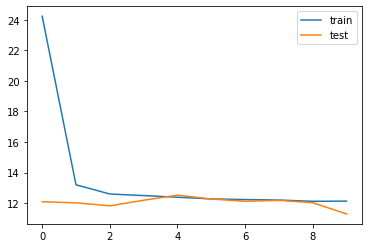

In [139]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [84]:
train_X.shape

(70080, 1, 27)

In [88]:
# make a prediction
yhat = model.predict(test_X)
test_XX = test_X.reshape((test_X.shape[0], 27))

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_XX[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_XX[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

ValueError: operands could not be broadcast together with shapes (54056,8) (28,) (54056,8) 

In [91]:
test_X.shape

(54056, 1, 27)

In [141]:
test_X[50000:].shape

(4056, 1, 27)

In [143]:
test_X[50000:].reshape(test_X[50000:].shape[0], test_X[50000:].shape[2]).shape

(4056, 27)

In [140]:
hh = scaler.inverse_transform(test_X[50000:].reshape(test_X[50000:].shape[0], test_X[50000:].shape[2]))

ValueError: operands could not be broadcast together with shapes (4056,27) (4,) (4056,27) 

In [ ]:
hh.shape

In [107]:
hh = hh.reshape(hh.shape[0], 1, hh.shape[1])

In [ ]:
model.predict(hh)

In [ ]:
test_2019_df = supervised_df[supervised_df.Year.isin([2018, 2019])]
X_2019_df = test_2019_df[WS_columns]
y_2019_df = test_2019_df.Wind_Speed

In [ ]:
np.rint(pipe.predict(X_2019_df))

In [ ]:
y_2019_df.values

In [ ]:
sns.lineplot(range(X_2019_df.shape[0]), pipe.predict(X_2019_df))

In [ ]:
sns.lineplot(range(y_2019_df.shape[0]), y_2019_df.astype('int'))

In [ ]:
r2_score(
    y_true=y_2019_df.values,
    y_pred=np.rint(pipe.predict(X_2019_df)))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result = seasonal_decompose(x=supervised_df.set_index('Datetime').Wind_Speed, 
                            model='additive', freq=20)
result.plot()

In [ ]:
supervised_df['Wind_Speed'] = supervised_df['Wind_Speed'].astype('int64')

In [ ]:
supervised_df.set_index('Datetime').asfreq('d').index